# Business Understanding

Iremos analisar um dataset de treinamento do sklearn chamado 'california_housing' que trata de um senso realizado
no ano de 1990 no estado da Califórnia. Como é um dataset muito antigo, provavelmente não serveria para predizer
preços do ano atual, porém o nosso foco é treinar habilidades sobre regressão linear usando o sklearn.

# Data Understanding

### Importando bibliotecas

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### Criando DataFrame

In [6]:
data = fetch_california_housing(as_frame= True)

# imprimindo descrição do dataset
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [3]:
# definindo a variavel target, com uso de método
target = data.target
target

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [4]:
data = fetch_california_housing()
df = pd.DataFrame(data = data.data, columns = data.feature_names)
# criando a coluna da variavel target no dataframe
df['MedHouseVal'] = target
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


Como observado no nosso dataframe não existe dado nulo, sendo assim não será preciso fazer nenhum tratamento de notnull

In [6]:
df.columns


Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
       'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

<img src="image-20231025-105431.png" width="" align="" />

In [7]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


insights do describe:

- olhando a variável MedInc percebemos que 25% de nossas observações tem uma renda mediana de 2.56, 50%(mediana) tem renda até 3.53 e 75% até 4.74, porém é perceptivel a alta variabilidade dos dados ao observar o ultimo quartil com o máximo de renda 15, onde a média da mediana da renda é de 3.87.

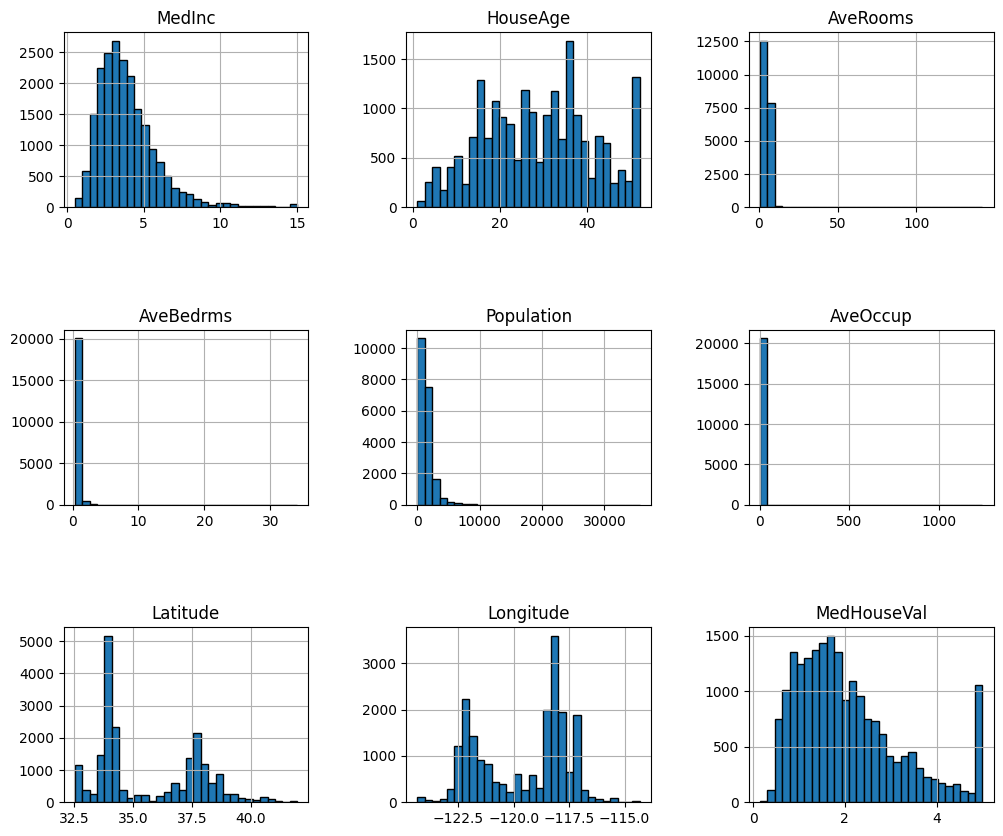

In [8]:
#criando gráfico para uma vizualisação mais clara
df.hist(figsize=(12,10), bins=30, edgecolor = 'black')
plt.subplots_adjust(hspace = 0.7, wspace = 0.4)

Analisando a distribuição de cada variável, é perceptível que algumas variáveis tem uma alta variabilidade de dados. Com certeza enviar esses dados para um modelo de machine learning acarretará em erros e baixa eficiência do modelo.

Na etapa de melhoria darei sugestões de como podemos melhoras essas distribuições

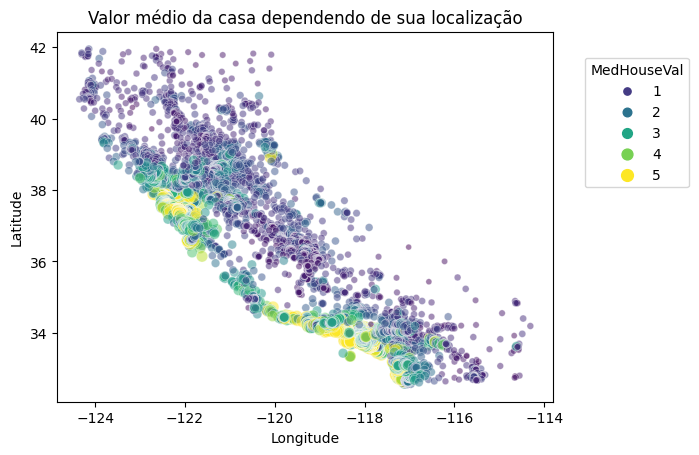

In [9]:
# aqui plotarei um gráfico scatter para vizualizar a relação entre as cordenadas e a variável target(MedHouseValue)
sns.scatterplot(
data = df, 
x = 'Longitude', 
y = 'Latitude',
size= 'MedHouseVal',
hue= 'MedHouseVal',
palette= 'viridis',
alpha = 0.5,
)
plt.legend(title = 'MedHouseVal', bbox_to_anchor = (1.05, 0.95), loc = 'upper left')
_ = plt.title("Valor médio da casa dependendo de sua localização")

É perceptível que as casas mais caras estão localizadas mais próximas ao mar.

# Data Preparation

In [10]:
# Separando colunas de treino (X) e coluna alvo (y)
X = df[df.columns[:-1]]
y = df[['MedHouseVal']]


In [11]:
# Criando modelo de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

In [12]:
scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

# Modeling

In [13]:
# Criando modelo de regressão linear
model = LinearRegression()
model.fit(X_train_scale, y_train)

# Fazendo a previsão do modelo
y_pred = model.predict(X_test_scale)

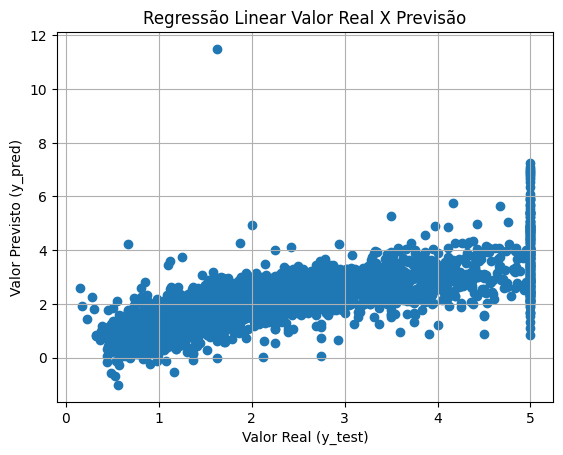

In [14]:
plt.figure()
plt.scatter(y_test, y_pred)
plt.xlabel('Valor Real (y_test)')
plt.ylabel('Valor Previsto (y_pred)')
plt.title('Regressão Linear Valor Real X Previsão')
plt.grid(True)

#plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=1)
plt.show()

# Evaluation

In [15]:
rmse = mean_squared_error(y_test, y_pred, squared= False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(rmse, mae, r2)

0.7455813830127763 0.5332001304956566 0.575787706032451


Com esses valores de erro, este projeto voltaria ao estagio inicial para melhorar a qualidade dos dados. Estou partindo do pressuposto que o cliente pediu um erro MAE no maximo 10 e um R2 no minimo 0.6

Como observado no evaluation, o RMSE e o MAE estão com valores muito altos, o que justifica o tratamento de variáveis com distribuição de calda longa ('MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup',
 'MedHouseVal) usando logaritimo conforme podemos ver abaixo:

In [16]:
df_melhoria = df.copy()
df_melhoria['MedInc'] = np.log(df_melhoria['MedInc'])
df_melhoria['HouseAge'] = np.log10(df_melhoria['HouseAge'])
df_melhoria['AveRooms'] = np.log10(df_melhoria['AveRooms'])
df_melhoria['AveBedrms'] = np.log10(df_melhoria['AveBedrms'])
df_melhoria['Population'] = np.log10(df_melhoria['Population'])
df_melhoria['AveOccup'] = np.log10(df_melhoria['AveOccup'])
df_melhoria['MedHouseVal'] = np.log10(df_melhoria['MedHouseVal'])


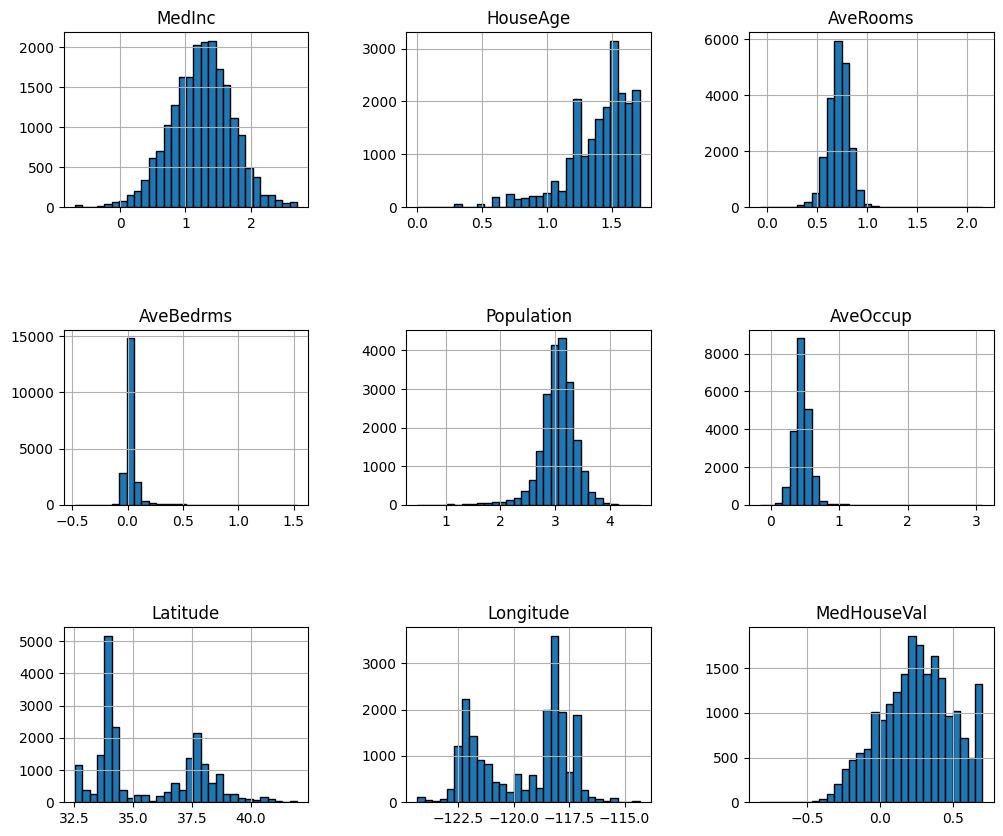

In [17]:
df_melhoria.hist(figsize=(12,10), bins=30, edgecolor = 'black')
plt.subplots_adjust(hspace = 0.7, wspace = 0.4)


In [18]:
X = df_melhoria[df.columns[:-1]]
y = df_melhoria[['MedHouseVal']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

scale = StandardScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

model = LinearRegression()
model.fit(X_train_scale, y_train)
y_pred = model.predict(X_test_scale)

rmse = mean_squared_error(y_test, y_pred, squared= False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(rmse, mae, r2)

0.14427651201622424 0.10661993489596575 0.6599679931312514


In [20]:
X = df[df.columns[:-1]]
y = df[['MedHouseVal']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)

scale = MinMaxScaler()
X_train_scale = scale.fit_transform(X_train)
X_test_scale = scale.transform(X_test)

model = LinearRegression()
model.fit(X_train_scale, y_train)
y_pred = model.predict(X_test_scale)

rmse = mean_squared_error(y_test, y_pred, squared= False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(rmse, mae, r2)

0.745581383012776 0.5332001304956556 0.5757877060324512


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7732640e-2b65-4af6-91b7-f9b902211bbf' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>